In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
!pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
skincare = pd.read_csv('/content/drive/MyDrive/skincare.csv')
skincare.head()
#skincare.shape

,Customer ID,Skin Type,Product Type,Brand,Price Range
0,1,Oily,Moisturizer,Neutrogena,Affordable
1,2,Dry,Cleanser,Cetaphil,Mid-Range
2,3,Combination,Serum,The Ordinary,Affordable
3,4,Sensitive,Sunscreen,La Roche-Posay,Mid-Range
4,5,Oily,Moisturizer,CeraVe,Affordable


Estimating optimal K value for Clustering
As we know, in K-Mode Clustering, the clusters are considered based on the esmtimation of the dissimilarities among clusters. So, we will try to find the K value (Number of Clusters) using a formal method, called elbow method. Whichever K has less cost, will be estimated as the best K value for the provided dataset.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 169.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 169.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 169.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 169.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 169.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 140.0
Run 1, iteration: 2/100, moves: 2, cost: 140.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 11, cost: 143.0
Run 2, iteration: 2/100, moves: 3, cost: 

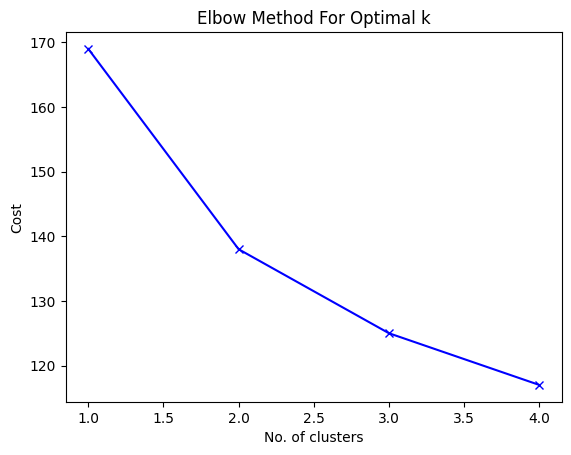

In [6]:

cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(skincare)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()


Deciding and Building Clusters
We see the largest decrease of that quantity between K=1 and K=2 and then the second largest drop is between K=2 and K=3. Afterwards, the further decrease in K has ever so smaller impact on the Sum of Overall cost. Hence, we identify K=2 as the elbow point.
So, if we now proceed with k=2, then:

In [9]:
# Building the model with 2 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(skincare)
print(clusters)

skincare.insert(0, "Cluster", clusters)
print(skincare)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 13, cost: 140.0
Run 1, iteration: 2/100, moves: 0, cost: 140.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 10, cost: 142.0
Run 2, iteration: 2/100, moves: 3, cost: 140.0
Run 2, iteration: 3/100, moves: 1, cost: 140.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1, cost: 138.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 138.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1, cost: 141.0
Best run was number 3
[0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1
 1 1 0 0 0 0 1]
    Cluster            0            1             2                 3  \
0         0  Customer ID    Skin Typ

In [11]:
skincare=skincare.drop('Cluster', axis= 1)
print(skincare)

              0            1             2                 3            4
0   Customer ID    Skin Type  Product Type             Brand  Price Range
1             1         Oily   Moisturizer        Neutrogena   Affordable
2             2          Dry      Cleanser          Cetaphil    Mid-Range
3             3  Combination         Serum      The Ordinary   Affordable
4             4    Sensitive     Sunscreen    La Roche-Posay    Mid-Range
5             5         Oily   Moisturizer            CeraVe   Affordable
6             6  Combination      Cleanser              Olay   Affordable
7             7          Dry         Serum      Estee Lauder       Luxury
8             8    Sensitive     Sunscreen            Aveeno    Mid-Range
9             9  Combination   Moisturizer           Kiehl's    Mid-Range
10           10         Oily      Cleanser           Garnier   Affordable
11           11    Sensitive         Serum      Sunday Riley       Luxury
12           12  Combination     Sunsc